# Some interesting inferences

## Importing seaborn for drawing interesting and statistical graphs. Importing plotly to style the interactive graphs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings

# C:\Users\khurd\Documents\256\Group_project
# data_dating = pd.read_csv("C:/Users/khurd/Documents/256/Group_project/Speed_Dating_Data.csv", encoding="ISO-8859-1")
data_dating = pd.read_csv('/Users/aakashkanvinde/Desktop/Semester 2/CMPE 256 - Large Scale Analytics/Project/Group/Data Set/Speed Dating Data.csv', encoding="ISO-8859-1")
data_dating.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


## Checking the total number of men and women

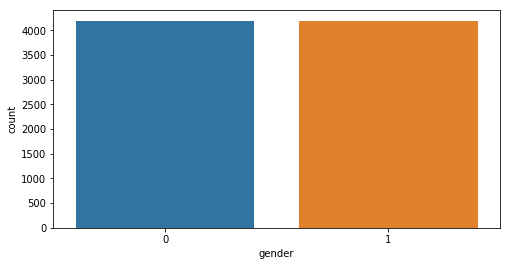

In [2]:
plt.figure(figsize=(8,4))
sns.countplot(x='gender', data=data_dating)
plt.show()

## Maximum participants from both the genders are in the age group 20-30

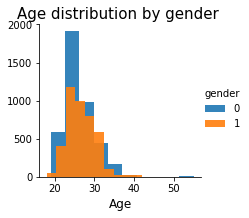

In [3]:
ageplot = sns.FacetGrid(data_dating, hue='gender')
ageplot.map(plt.hist, 'age', alpha= 0.9)
ageplot.set_xlabels('Age', fontsize=12)
plt.subplots_adjust(top=0.9)
ageplot.fig.suptitle('Age distribution by gender', fontsize=15)
ageplot.add_legend()
plt.show()

## We can conclude from the graphs that Men give most significance to 'attractiveness' in women whereas women give most significance to 'intelligence' in men

In [4]:
box_gender = data_dating[['gender','attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']].groupby('gender').mean()
cols = ['Attractive','Sincere','Intelligence','Fun','Ambituous','Shared Interests']
box_gender.columns = cols

In [5]:
bar1 = go.Bar(
    y=list(box_gender.iloc[0]),
    x=box_gender.columns.values,
    name='Women',
    marker=dict(
        color='red'
    )
)
bar2 = go.Bar(
    y=list(box_gender.iloc[1]),
    x=box_gender.columns.values,
    name='Men',
    marker=dict(
        color='green'
    )
)

data = [bar1, bar2]
layout = go.Layout(
    title='What People Look For in the Opposite Sex',
    font=dict(
        size=10
    ),
    legend=dict(
        font=dict(
            size=10
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='barplot')

## We infer from the countplot that both men and women took the date as a fun night out

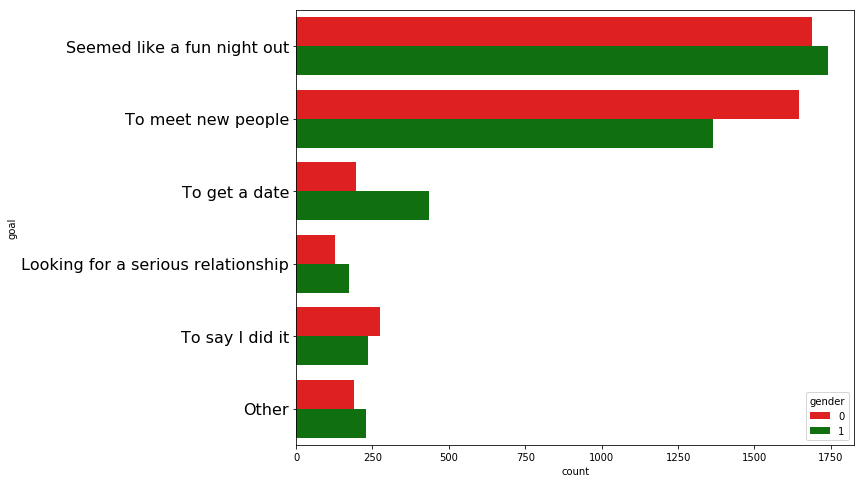

In [6]:
goals = ['Seemed like a fun night out','To meet new people','To get a date'
        ,'Looking for a serious relationship','To say I did it','Other']
plt.figure(figsize=(10,8))
sn = sns.countplot(y='goal',data=data_dating, hue='gender', palette=['red','green'])
sn.set(yticklabels=goals)
sn.set
sn = plt.yticks(rotation=0,fontsize=16)

## Gender wise goal distribution where 

#### 1: Seemed like a fun night out
#### 2: To meet new people
#### 3: To get a date
#### 4: Looking for a serious relationship
#### 5: To say I did it
#### 6: Other


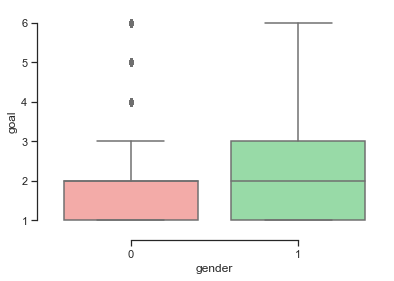

In [7]:
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="gender", y="goal",
            hue=None, palette=["r", "g"],
            data=data_dating)
sns.despine(offset=10, trim=True)

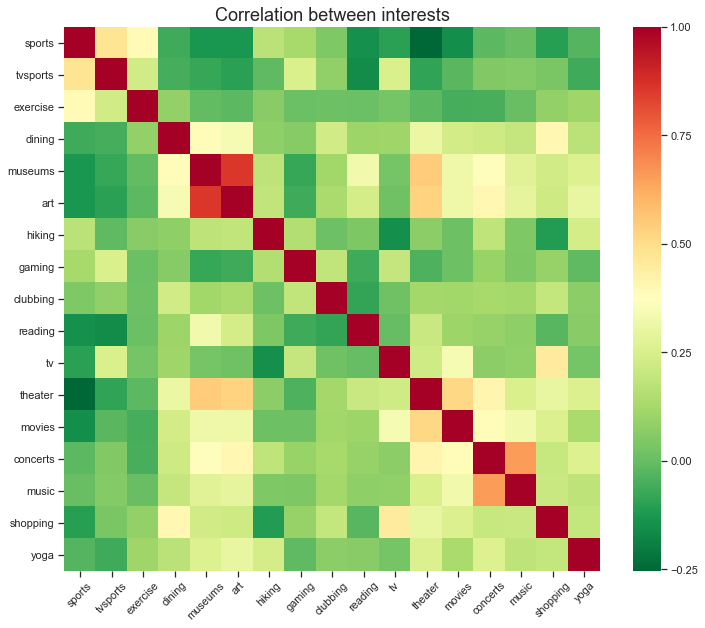

In [8]:
interests = ['sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga']

corr = data_dating[interests].corr()
plt.figure(figsize=(12,10))
ax = sns.heatmap(corr, cmap='RdYlGn_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Correlation between interests', fontsize=18)
plt.show()

-----

In [9]:
# narrowing the dataset
data_1 = data_dating.iloc[:, 11:28]
data_2 = data_dating.iloc[:,30:35]
data_3 = data_dating.iloc[:, 39:43]
data_4 = data_dating.iloc[:, 45:67]
data_5 = data_dating.iloc[:, 69:74]
data_6 = data_dating.iloc[:, 87:91]
data_7 = data_dating.iloc[:, 97:102]
data_8 = data_dating.iloc[:, 104:107]


date = pd.concat([data_dating.iloc[:, 0],data_dating.iloc[:, 2],data_1,data_2,data_3,data_4,data_5,
                  data_6,data_7,data_8], axis=1)
date.head()

,iid,gender,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,...,fun3_1,intel3_1,dec,attr,sinc,intel,fun,like,prob,met
0,1,0,11.0,0,0.14,0,27.0,2.0,35.0,20.0,...,8.0,8.0,1,6.0,9.0,7.0,7.0,7.0,6.0,2.0
1,1,0,12.0,0,0.54,0,22.0,2.0,60.0,0.0,...,8.0,8.0,1,7.0,8.0,7.0,8.0,7.0,5.0,1.0
2,1,0,13.0,1,0.16,1,22.0,4.0,19.0,18.0,...,8.0,8.0,1,5.0,8.0,9.0,8.0,7.0,NaN,1.0
3,1,0,14.0,1,0.61,0,23.0,2.0,30.0,5.0,...,8.0,8.0,1,7.0,6.0,8.0,7.0,7.0,6.0,2.0
4,1,0,15.0,1,0.21,0,24.0,3.0,30.0,10.0,...,8.0,8.0,1,5.0,6.0,7.0,7.0,6.0,6.0,2.0


In [10]:
# removing null rows
date2 = date.dropna()

In [11]:
# creating an object- free data frame and removing interests
# date3 = date2.drop(['field', 'from', 'career'], axis=1)
date2 = date2.drop(['field', 'from', 'career', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 
                    'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 
                   'shopping', 'yoga'], axis=1)

In [12]:
# # removing intrests
# date4 = date3.drop(['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 
#                     'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 
#                    'shopping', 'yoga'], axis=1)

In [13]:
# encoding unrequited love as a new column
date2['url']=np.where(((date2['dec_o']==0) & (date2['dec']==1))|((date2['dec']==0) & (date2['dec_o']==1)),1,0)

Text(0.5, 0, 'Broken Heart')

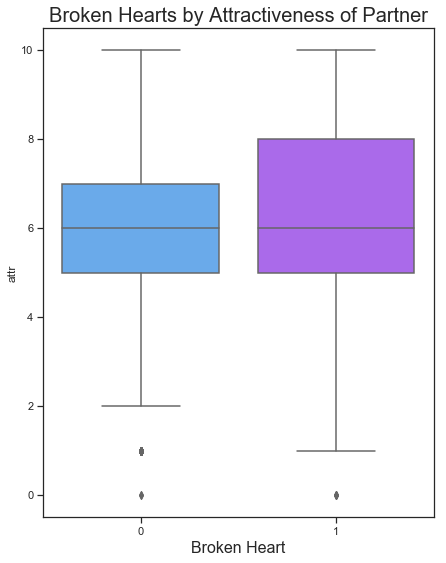

In [14]:
# looking at url by attractiveness
plt.figure(figsize=(7,9))
sns.boxplot(x='url', y='attr', data=date2, palette='cool')
plt.title('Broken Hearts by Attractiveness of Partner', fontsize=20)
plt.xlabel('Broken Heart', fontsize=16)